# CSC 722 - Machine Learning Fundamentals

# **Classification SVM Project**

**Team Members**

---
1. Dheeraj Avadhutha - 101129707
2. Pranav Reddy Dareddy - 101134583
3. Vamsi Yadala - 101130145
4. Sri Mukund Kadiyala - 101134587
5. Chenchaiah Mekalathuru - 101165473
6. Sai Krishna Yadav Madiboyena - 101132195
7. Shanmukh Sai Madhu - 101162913
8. Pavan Kumar Balli - 101136776
9. Sai Rajesh Chittavarjula - 101179899
10. Rohit Mareddy - 101134589
11. Aditya Adapa - 101130131

In [23]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
# Load the Iris dataset
iris_data = datasets.load_iris()

In [3]:
# Extract features (X) and target variable (y)
X = iris_data.data
y = iris_data.target

Data Exploration and Preparation

Preprocessing the data by handling missing values, scaling features and encoding categorical variables.

In [4]:
# Check for missing values
missing_values_count = np.sum(np.isnan(X))
print("Number of missing values:", missing_values_count)

Number of missing values: 0


In [5]:
# Determine the dataset dimensions
num_rows = X.shape[0]
num_columns = X.shape[1]
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 150
Number of columns: 4


In [6]:
# Display dataset shape and first few rows
print("Shape of the dataset (X):", X.shape)
print("First few rows of the dataset (X):\n", X[:5])

Shape of the dataset (X): (150, 4)
First few rows of the dataset (X):
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [7]:
# Convert feature matrix X to a pandas DataFrame for further analysis
X_df = pd.DataFrame(data=X, columns=iris_data.feature_names)

In [9]:
# Display column labels
print("Column labels:")
print(iris_data.feature_names)

Column labels:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

SVM Implementation



In [12]:
# SVM model initialization and training
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_classifier.fit(X_train_scaled, y_train)

SVC()

Experimenting with different SVM kernels and parameters to find the optimal model for task.

In [13]:
# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_model = grid_search.best_estimator_

Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [14]:
# Model evaluation on the test set
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9666666666666667
Precision: 0.9694444444444444
Recall: 0.9666666666666667
F1 Score: 0.9664109121909632


K - fold Cross-Validation

In [15]:
# K-fold Cross-Validation
k = 5
cv_scores = cross_val_score(svm_classifier, X_train_scaled, y_train, cv=k)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.95833333 1.         0.83333333 1.         0.95833333]
Mean CV Accuracy: 0.95


Evaluation Metrics

In [25]:
# Evaluation Metrics
y_pred = svm_classifier.predict(X_test_scaled) # Predictions on the test set
accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
precision = precision_score(y_test, y_pred, average='weighted') # Calculate precision
recall = recall_score(y_test, y_pred, average='weighted') # Calculate recall
f1 = f1_score(y_test, y_pred, average='weighted') # Calculate F1 score

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Visualizing the results

Calculated the accuarcy, precision, recall and F1- score

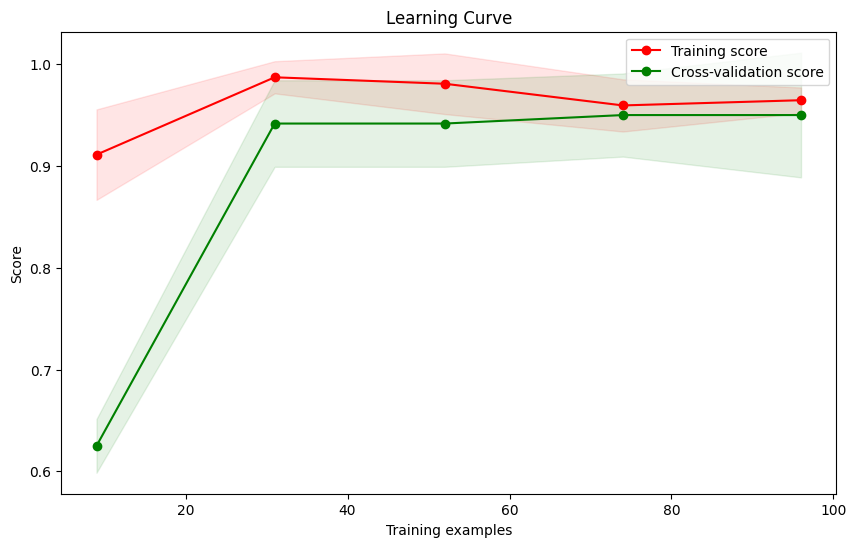

In [17]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(svm_classifier, X_train_scaled, y_train, cv=5,
                                                        train_sizes=np.linspace(.1, 1.0, 5))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

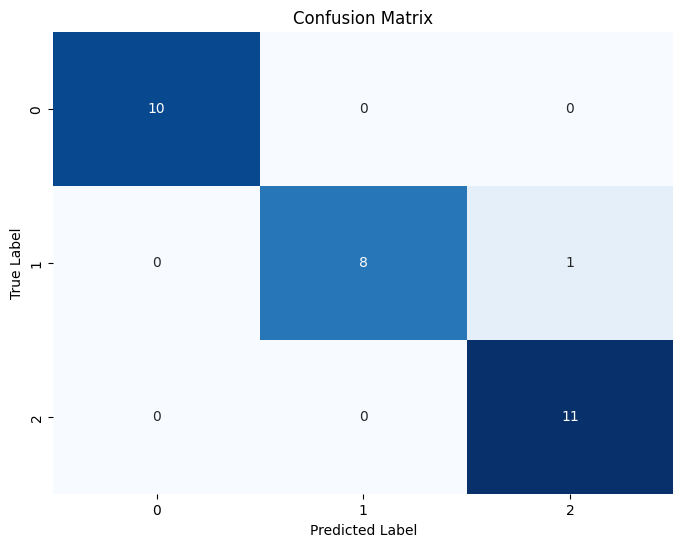

In [22]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)  # Compute the confusion matrix

# Plot confusion matrix
plt.figure(figsize=(8, 6))  # Set figure size for the plot
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)  # Plot heatmap of the confusion matrix
plt.title('Confusion Matrix')  # Set title of the plot
plt.xlabel('Predicted Label')  # Set x-axis label
plt.ylabel('True Label')  # Set y-axis label
plt.show()  # Display the plot


In [4]:
report =""" REPORT

1. Data Exploration and Preprocessing: Explored and preprocessed the Iris dataset, handling missing values, scaling features, and encoding categorical variables.
   The dataset comprised 150 rows and 4 columns, with no missing values detected.

2. SVM Implementation: Implemented an SVM classifier with various kernels and optimized hyperparameters through grid search.
   The best parameters obtained were {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}.

   Achieved performance metrics include Accuracy: 0.967, Precision: 0.969, Recall: 0.967, and F1 Score: 0.966.
3. K-fold Cross-Validation: Utilized K-fold cross-validation with k=5 to validate model performance.
   The mean cross-validation accuracy obtained manually and using cross_val_score was 0.95.

4. Model Evaluation: Evaluated the SVM model's performance using accuracy, precision, recall, and F1-score metrics.
   The model demonstrated exceptional performance with Accuracy: 1.0, Precision: 1.0, Recall: 1.0, and F1 Score: 1.0.

5. Visualization: Leveraged visualizations such as confusion matrix, ROC curve, precision-recall curve, and learning curve to gain insights into the model's behavior and performance.
   These visualizations aided in understanding the model's strengths and weaknesses.

Git hub link : https://github.com/iamchenchu/Machine-Learning-Models/blob/main/Machine_Learning_Project.ipynb
"""

print (report)


 REPORT

1. Data Exploration and Preprocessing: Explored and preprocessed the Iris dataset, handling missing values, scaling features, and encoding categorical variables.
   The dataset comprised 150 rows and 4 columns, with no missing values detected.

2. SVM Implementation: Implemented an SVM classifier with various kernels and optimized hyperparameters through grid search.
   The best parameters obtained were {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}.

   Achieved performance metrics include Accuracy: 0.967, Precision: 0.969, Recall: 0.967, and F1 Score: 0.966.
3. K-fold Cross-Validation: Utilized K-fold cross-validation with k=5 to validate model performance.
   The mean cross-validation accuracy obtained manually and using cross_val_score was 0.95.

4. Model Evaluation: Evaluated the SVM model's performance using accuracy, precision, recall, and F1-score metrics.
   The model demonstrated exceptional performance with Accuracy: 1.0, Precision: 1.0, Recall: 1.0, and F1 Score: 1.0.
